In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from monai.networks.layers import Reshape
from monai.visualize import matshow3d

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.linear = nn.Linear(100, 256*8*8*4)
        self.reshape = Reshape(256, 8, 8, 4)

        self.net = nn.Sequential(
            self._block(256, 128, 4, 2, 1),
            self._block(128, 64, 4, 2, 1),
            self._block(64, 32, 4, 2, 1),
            self._block(32, 16, (4,4,3), (2,2,1), 1),
            self._block(16, 1, (4,4,3), (2,2,1), 1),
            nn.Tanh(),
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose3d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.linear(x)
        x = self.reshape(x)
        x = self.net(x)
        return x

In [7]:
generator = Generator()
generator.load_state_dict(torch.load('/data2/etude/micorl/WGAN/models/checkpoint_04-12-2023_16:48.pt')['generator'])

<All keys matched successfully>

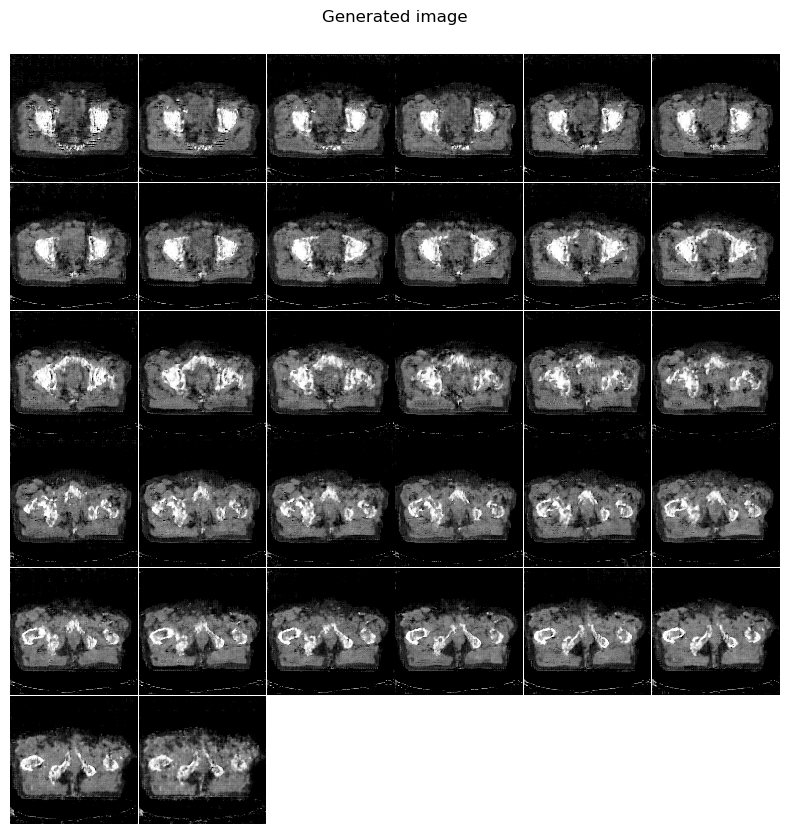

In [11]:
noise = torch.randn(1, 100)
with torch.no_grad():
    fake = generator(noise)
    fig = plt.figure(figsize=(15,15))
    matshow3d(volume=fake,
            fig=fig,
            title="Generated image",
            every_n=1,
            frame_dim=-1,
            cmap="gray")